In [61]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import random
import os
import seaborn as sns
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2.9.1
Num GPUs Available:  1


In [111]:
LR = 5e-4
batch_size = 6
epochs = 70
patience = 30
dropout = 0.7
model_name = f'model3_lab_6_lr{LR:.0e}_b{batch_size}_do{dropout}'
model_name = 'labtest'

dataset_dir = 'lab'

input_shape = (60, 60, 3)
num_classes = 5
model = tf.keras.Sequential(
    [
        tf.keras.Input(shape=input_shape),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(32, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(16, kernel_size=(3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
        layers.BatchNormalization(),
        layers.MaxPooling2D(pool_size=(2, 2)),
        
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(32, activation='relu'),
        layers.Dropout(dropout),
        layers.Dense(num_classes, activation='softmax'),
    ]
)
model.summary()
model.compile(optimizer=tf.keras.optimizers.Adam(LR),
              loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_60 (Conv2D)          (None, 60, 60, 16)        448       
                                                                 
 batch_normalization_60 (Bat  (None, 60, 60, 16)       64        
 chNormalization)                                                
                                                                 
 max_pooling2d_68 (MaxPoolin  (None, 30, 30, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_61 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                     

In [112]:
train_generator = ImageDataGenerator(
        rotation_range=360,
        height_shift_range=0.5,
        width_shift_range=0.5,
        shear_range=70,
        brightness_range=(0.5, 1),
        zoom_range=[0.6, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

valid_generator = ImageDataGenerator(
        rotation_range=360,
        brightness_range=(0.5, 1),
        zoom_range=[0.6, 1],
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='reflect',
        rescale=1./255,
)

train_flow = train_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'{dataset_dir}/train',
        shuffle=True,
        target_size=input_shape[:-1],
    )

valid_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'{dataset_dir}/valid',
        shuffle=True,
        target_size=input_shape[:-1],
    )

test_flow = valid_generator.flow_from_directory(
        batch_size=batch_size,
        directory=f'{dataset_dir}/test',
        shuffle=False,
        target_size=input_shape[:-1],
    )

Found 400 images belonging to 5 classes.
Found 70 images belonging to 5 classes.
Found 75 images belonging to 5 classes.


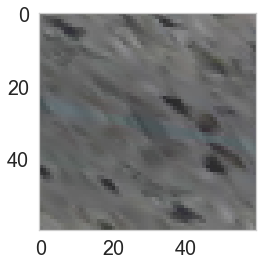

In [119]:
sns.set_style("whitegrid", {'axes.grid' : False})
for _ in range(5):
    img, label = train_flow.next()
    #print(img.shape)   #  (1,256,256,3)
    plt.imshow(img[0])
    #plt.imsave('augment.jpg', img[0])

In [120]:
STEP_SIZE_TRAIN=train_flow.n//train_flow.batch_size
STEP_SIZE_VALID=valid_flow.n//valid_flow.batch_size

checkpoint = tf.keras.callbacks.ModelCheckpoint(f'trained_models/{model_name}', save_best_only=True)
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience)
history = model.fit(train_flow,
            steps_per_epoch=STEP_SIZE_TRAIN,
            validation_data=valid_flow,
            validation_steps=STEP_SIZE_VALID,
            epochs=epochs,
            callbacks=[stop_early, checkpoint],
)

Epoch 1/70
66/66 [==============================] - ETA: 0s - loss: 2.3065 - accuracy: 0.2487

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 7s 91ms/step - loss: 2.3065 - accuracy: 0.2487 - val_loss: 1.6116 - val_accuracy: 0.1515
Epoch 2/70
66/66 [==============================] - ETA: 0s - loss: 2.0345 - accuracy: 0.1904

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 62ms/step - loss: 2.0345 - accuracy: 0.1904 - val_loss: 1.6063 - val_accuracy: 0.2727
Epoch 3/70
66/66 [==============================] - 2s 26ms/step - loss: 1.8333 - accuracy: 0.2335 - val_loss: 1.6212 - val_accuracy: 0.2273
Epoch 4/70
65/66 [============================>.] - ETA: 0s - loss: 1.8173 - accuracy: 0.2448

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 68ms/step - loss: 1.8162 - accuracy: 0.2462 - val_loss: 1.6061 - val_accuracy: 0.2121
Epoch 5/70
65/66 [============================>.] - ETA: 0s - loss: 1.7238 - accuracy: 0.2268

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 64ms/step - loss: 1.7206 - accuracy: 0.2284 - val_loss: 1.5859 - val_accuracy: 0.2424
Epoch 6/70
64/66 [============================>.] - ETA: 0s - loss: 1.6557 - accuracy: 0.2120

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 63ms/step - loss: 1.6535 - accuracy: 0.2157 - val_loss: 1.5764 - val_accuracy: 0.3030
Epoch 7/70
63/66 [===========================>..] - ETA: 0s - loss: 1.6892 - accuracy: 0.2128

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 5s 70ms/step - loss: 1.6803 - accuracy: 0.2157 - val_loss: 1.5229 - val_accuracy: 0.4242
Epoch 8/70
64/66 [============================>.] - ETA: 0s - loss: 1.6189 - accuracy: 0.2565

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 63ms/step - loss: 1.6151 - accuracy: 0.2589 - val_loss: 1.4991 - val_accuracy: 0.4242
Epoch 9/70
64/66 [============================>.] - ETA: 0s - loss: 1.5389 - accuracy: 0.3482

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 63ms/step - loss: 1.5398 - accuracy: 0.3477 - val_loss: 1.4924 - val_accuracy: 0.4394
Epoch 10/70
64/66 [============================>.] - ETA: 0s - loss: 1.5461 - accuracy: 0.3377

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 65ms/step - loss: 1.5379 - accuracy: 0.3376 - val_loss: 1.4233 - val_accuracy: 0.5152
Epoch 11/70
64/66 [============================>.] - ETA: 0s - loss: 1.5094 - accuracy: 0.3586

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 5s 76ms/step - loss: 1.5084 - accuracy: 0.3629 - val_loss: 1.3795 - val_accuracy: 0.6212
Epoch 12/70
64/66 [============================>.] - ETA: 0s - loss: 1.5379 - accuracy: 0.3168

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 64ms/step - loss: 1.5382 - accuracy: 0.3096 - val_loss: 1.2692 - val_accuracy: 0.6364
Epoch 13/70
66/66 [==============================] - 2s 25ms/step - loss: 1.4722 - accuracy: 0.3477 - val_loss: 1.2842 - val_accuracy: 0.6212
Epoch 14/70
66/66 [==============================] - 1s 22ms/step - loss: 1.4496 - accuracy: 0.3807 - val_loss: 1.3088 - val_accuracy: 0.4697
Epoch 15/70
66/66 [==============================] - 1s 20ms/step - loss: 1.3307 - accuracy: 0.4391 - val_loss: 1.3019 - val_accuracy: 0.3939
Epoch 16/70
63/66 [===========================>..] - ETA: 0s - loss: 1.3087 - accuracy: 0.4814

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 6s 88ms/step - loss: 1.3146 - accuracy: 0.4822 - val_loss: 1.1440 - val_accuracy: 0.5000
Epoch 17/70
64/66 [============================>.] - ETA: 0s - loss: 1.3270 - accuracy: 0.3848

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 5s 74ms/step - loss: 1.3196 - accuracy: 0.3909 - val_loss: 1.0538 - val_accuracy: 0.6364
Epoch 18/70
65/66 [============================>.] - ETA: 0s - loss: 1.3075 - accuracy: 0.4098

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 7s 104ms/step - loss: 1.3063 - accuracy: 0.4137 - val_loss: 0.9890 - val_accuracy: 0.6212
Epoch 19/70
64/66 [============================>.] - ETA: 0s - loss: 1.2549 - accuracy: 0.4529

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 5s 76ms/step - loss: 1.2528 - accuracy: 0.4543 - val_loss: 0.8943 - val_accuracy: 0.7121
Epoch 20/70
65/66 [============================>.] - ETA: 0s - loss: 1.2841 - accuracy: 0.4459

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 5s 69ms/step - loss: 1.2763 - accuracy: 0.4492 - val_loss: 0.8143 - val_accuracy: 0.6970
Epoch 21/70
65/66 [============================>.] - ETA: 0s - loss: 1.2375 - accuracy: 0.4356

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 64ms/step - loss: 1.2493 - accuracy: 0.4289 - val_loss: 0.7049 - val_accuracy: 0.6364
Epoch 22/70
66/66 [==============================] - 1s 21ms/step - loss: 1.1902 - accuracy: 0.4594 - val_loss: 0.8884 - val_accuracy: 0.6212
Epoch 23/70
66/66 [==============================] - 1s 20ms/step - loss: 1.2475 - accuracy: 0.4492 - val_loss: 1.1797 - val_accuracy: 0.4091
Epoch 24/70
66/66 [==============================] - 1s 18ms/step - loss: 1.1744 - accuracy: 0.4924 - val_loss: 1.0260 - val_accuracy: 0.5303
Epoch 25/70
65/66 [============================>.] - ETA: 0s - loss: 1.2257 - accuracy: 0.4974

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 5s 69ms/step - loss: 1.2325 - accuracy: 0.4975 - val_loss: 0.6786 - val_accuracy: 0.7424
Epoch 26/70
66/66 [==============================] - 1s 19ms/step - loss: 1.1042 - accuracy: 0.5685 - val_loss: 0.7243 - val_accuracy: 0.7576
Epoch 27/70
66/66 [==============================] - 1s 19ms/step - loss: 1.1603 - accuracy: 0.4873 - val_loss: 1.0135 - val_accuracy: 0.5152
Epoch 28/70
66/66 [==============================] - 1s 19ms/step - loss: 1.0876 - accuracy: 0.5558 - val_loss: 1.6997 - val_accuracy: 0.2576
Epoch 29/70
66/66 [==============================] - ETA: 0s - loss: 1.0718 - accuracy: 0.5482

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 63ms/step - loss: 1.0718 - accuracy: 0.5482 - val_loss: 0.5909 - val_accuracy: 0.8182
Epoch 30/70
66/66 [==============================] - 1s 19ms/step - loss: 1.0808 - accuracy: 0.5660 - val_loss: 1.7273 - val_accuracy: 0.3788
Epoch 31/70
66/66 [==============================] - 1s 19ms/step - loss: 1.1207 - accuracy: 0.5330 - val_loss: 0.6189 - val_accuracy: 0.8788
Epoch 32/70
65/66 [============================>.] - ETA: 0s - loss: 1.0003 - accuracy: 0.5954

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 62ms/step - loss: 0.9963 - accuracy: 0.5964 - val_loss: 0.5708 - val_accuracy: 0.8030
Epoch 33/70
66/66 [==============================] - 1s 19ms/step - loss: 0.9601 - accuracy: 0.5964 - val_loss: 0.5798 - val_accuracy: 0.7727
Epoch 34/70
66/66 [==============================] - 1s 19ms/step - loss: 0.9218 - accuracy: 0.6142 - val_loss: 2.2063 - val_accuracy: 0.4091
Epoch 35/70
66/66 [==============================] - 1s 19ms/step - loss: 0.9817 - accuracy: 0.5990 - val_loss: 0.6339 - val_accuracy: 0.7121
Epoch 36/70
66/66 [==============================] - 1s 19ms/step - loss: 0.8840 - accuracy: 0.6599 - val_loss: 1.6159 - val_accuracy: 0.4091
Epoch 37/70
66/66 [==============================] - 1s 19ms/step - loss: 0.9987 - accuracy: 0.6497 - val_loss: 1.0587 - val_accuracy: 0.5455
Epoch 38/70
64/66 [============================>.] - ETA: 0s - loss: 0.9392 - accuracy: 0.6387

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 68ms/step - loss: 0.9430 - accuracy: 0.6371 - val_loss: 0.5536 - val_accuracy: 0.7424
Epoch 39/70
64/66 [============================>.] - ETA: 0s - loss: 0.8747 - accuracy: 0.6859

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 65ms/step - loss: 0.8669 - accuracy: 0.6904 - val_loss: 0.4010 - val_accuracy: 0.8030
Epoch 40/70
66/66 [==============================] - 1s 19ms/step - loss: 0.9154 - accuracy: 0.6117 - val_loss: 0.4482 - val_accuracy: 0.8030
Epoch 41/70
66/66 [==============================] - 1s 19ms/step - loss: 0.8986 - accuracy: 0.6802 - val_loss: 1.0339 - val_accuracy: 0.6515
Epoch 42/70
66/66 [==============================] - 1s 18ms/step - loss: 0.8972 - accuracy: 0.6675 - val_loss: 1.2016 - val_accuracy: 0.5000
Epoch 43/70
66/66 [==============================] - 1s 19ms/step - loss: 0.7965 - accuracy: 0.7030 - val_loss: 1.1990 - val_accuracy: 0.5152
Epoch 44/70
65/66 [============================>.] - ETA: 0s - loss: 0.8588 - accuracy: 0.6881

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 62ms/step - loss: 0.8582 - accuracy: 0.6853 - val_loss: 0.3522 - val_accuracy: 0.8788
Epoch 45/70
66/66 [==============================] - 1s 20ms/step - loss: 0.8022 - accuracy: 0.6929 - val_loss: 1.2734 - val_accuracy: 0.5758
Epoch 46/70
66/66 [==============================] - 1s 18ms/step - loss: 0.8125 - accuracy: 0.6827 - val_loss: 0.3535 - val_accuracy: 0.9242
Epoch 47/70
66/66 [==============================] - 1s 19ms/step - loss: 0.7552 - accuracy: 0.7360 - val_loss: 0.4145 - val_accuracy: 0.8939
Epoch 48/70
66/66 [==============================] - 1s 18ms/step - loss: 0.6886 - accuracy: 0.7538 - val_loss: 0.7005 - val_accuracy: 0.6515
Epoch 49/70
66/66 [==============================] - ETA: 0s - loss: 0.7686 - accuracy: 0.7284

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 63ms/step - loss: 0.7686 - accuracy: 0.7284 - val_loss: 0.2726 - val_accuracy: 0.8182
Epoch 50/70
66/66 [==============================] - 1s 18ms/step - loss: 0.7145 - accuracy: 0.7310 - val_loss: 0.5662 - val_accuracy: 0.7576
Epoch 51/70
66/66 [==============================] - 1s 19ms/step - loss: 0.7456 - accuracy: 0.7310 - val_loss: 0.3085 - val_accuracy: 0.9242
Epoch 52/70
66/66 [==============================] - 1s 19ms/step - loss: 0.7693 - accuracy: 0.6980 - val_loss: 1.7999 - val_accuracy: 0.4545
Epoch 53/70
66/66 [==============================] - 1s 19ms/step - loss: 0.6275 - accuracy: 0.7716 - val_loss: 0.3250 - val_accuracy: 0.8485
Epoch 54/70
66/66 [==============================] - 1s 21ms/step - loss: 0.6441 - accuracy: 0.7589 - val_loss: 0.3929 - val_accuracy: 0.8030
Epoch 55/70
66/66 [==============================] - 1s 19ms/step - loss: 0.6774 - accuracy: 0.7310 - val_loss: 0.5021 - val_accuracy: 0.7727
Epoch 56/70
66/66 

INFO:tensorflow:Assets written to: trained_models\labtest\assets


INFO:tensorflow:Assets written to: trained_models\labtest\assets


66/66 [==============================] - 4s 68ms/step - loss: 0.6636 - accuracy: 0.7766 - val_loss: 0.2087 - val_accuracy: 0.9545
Epoch 64/70
66/66 [==============================] - 1s 19ms/step - loss: 0.5680 - accuracy: 0.8020 - val_loss: 1.0752 - val_accuracy: 0.5909
Epoch 65/70
66/66 [==============================] - 1s 19ms/step - loss: 0.6816 - accuracy: 0.7817 - val_loss: 0.3657 - val_accuracy: 0.7727
Epoch 66/70
66/66 [==============================] - 1s 18ms/step - loss: 0.5915 - accuracy: 0.7868 - val_loss: 0.4152 - val_accuracy: 0.7879
Epoch 67/70
66/66 [==============================] - 1s 19ms/step - loss: 0.6698 - accuracy: 0.7792 - val_loss: 0.3519 - val_accuracy: 0.8636
Epoch 68/70
66/66 [==============================] - 1s 19ms/step - loss: 0.6220 - accuracy: 0.7970 - val_loss: 0.3388 - val_accuracy: 0.8636
Epoch 69/70
66/66 [==============================] - 1s 19ms/step - loss: 0.5562 - accuracy: 0.8249 - val_loss: 1.4878 - val_accuracy: 0.6364
Epoch 70/70
66/66 

In [126]:
# Save training history
hist_df = pd.DataFrame(history.history) 
hist_csv_file = f'trained_models/{model_name}/history.csv'
with open(hist_csv_file, mode='w') as f:
    hist_df.to_csv(f)

In [127]:
model = tf.keras.models.load_model('trained_models/' + model_name) #model_name

test_flow.reset()

scores = model.evaluate(test_flow)

print("%s%s: %.2f%%" % ("evaluate ", model.metrics_names[1], scores[1]*100))

13/13 [==============================] - 0s 16ms/step - loss: 0.3014 - accuracy: 0.8800
evaluate accuracy: 88.00%


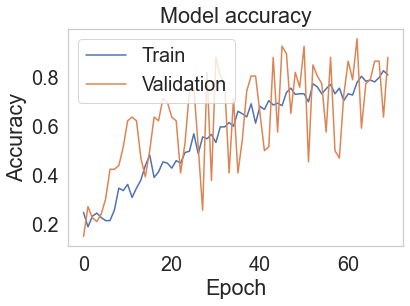

In [128]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

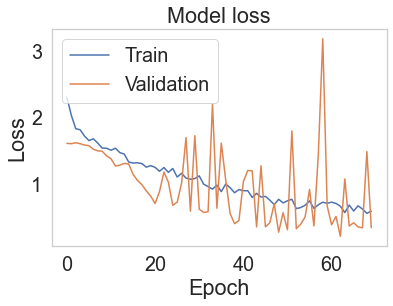

In [129]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss.png')
plt.show()

In [131]:
raw_datasets = f'{dataset_dir} datasets'
split_datasets = dataset_dir

CLASSES = []
for subdir in os.listdir(raw_datasets):
    CLASSES.append(subdir)
    
print(CLASSES)
    
index = 1
img_num = 34

TEST_IMAGES = []
TEST_LABELS = []
for subdir in os.listdir(split_datasets + '/test'):
    for file in os.listdir(os.path.join(split_datasets, 'test', subdir)):
        a = np.asarray(Image.open(f'{split_datasets}/test/{subdir}/{file}').resize(input_shape[:-1])).astype(np.float32)/255.
        TEST_IMAGES.append(a)
        TEST_LABELS.append(CLASSES.index(subdir))
        
TEST_IMAGES = np.asarray(TEST_IMAGES)
TEST_LABELS = np.asarray(TEST_LABELS)

img = np.asarray(Image.open(f'{raw_datasets}/{CLASSES[index]}/{img_num}.jpg').resize(input_shape[:-1])).astype(np.float32)/255.
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print(CLASSES[np.argmax(pred)])

['blackwoodtable', 'hallwaytile', 'labtile', 'longgrass', 'sidewalkconcrete']
1/1 [==============================] - 0s 19ms/step
hallwaytile


{'blackwoodtable': 0, 'hallwaytile': 1, 'labtile': 2, 'longgrass': 3, 'sidewalkconcrete': 4}
3/3 [==============================] - 1s 46ms/step


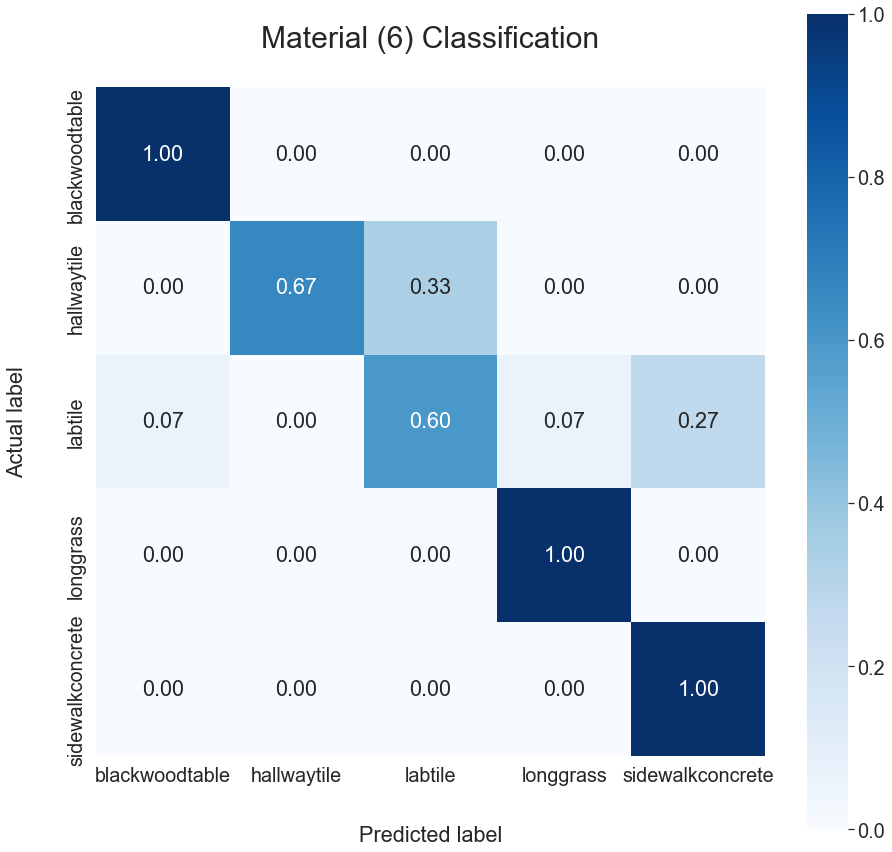

In [132]:
file_name = f'./confusion_matrix/{model_name}/confusion_matrix_{num_classes}class_{model_name}'
title = f'Material (6) Classification'

if not os.path.exists('./confusion_matrix'):
    os.mkdir('./confusion_matrix')

if not os.path.exists(f'./confusion_matrix/{model_name}'):
    os.mkdir(f'./confusion_matrix/{model_name}')

test_labels = test_flow.class_indices
print(test_labels)
predictions = tf.math.argmax(model.predict(TEST_IMAGES), axis=1)
cf = tf.math.confusion_matrix(TEST_LABELS, predictions).numpy()
cf = cf / cf.sum(axis=1)[:, np.newaxis]
df = pd.DataFrame(cf, index=CLASSES, columns=CLASSES)
plt.figure(figsize=(15, 15))
sns.set(font_scale=1.8)
hm = sns.heatmap(df, annot=True, cmap='Blues', square=True, fmt='.2f')
plt.xlabel('Predicted label', labelpad=40)
plt.ylabel('Actual label', labelpad=40)
plt.title(title, y=1.03, pad=20, fontsize=30)
plt.savefig(file_name + '_transparent.png', transparent=True, bbox_inches="tight")
plt.savefig(file_name + '_white.png', transparent=False, facecolor='white', bbox_inches="tight")